In [55]:
import numpy as np
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [165]:
df_list = []
for i in range(2):
    df_list.append(pd.read_csv("plot/results_{}.txt".format(i), sep=" ", index_col=0))

df = pd.concat(df_list)
df

,best,mean,std
gen,,,
0,91.858736,8.776826,27.815984
1,91.858736,14.064007,31.022528
2,91.933573,18.727871,31.479738
3,91.933573,29.832303,35.687338
4,91.933573,41.684438,34.641113
5,91.933573,57.136531,31.237218
6,91.933573,72.951204,21.402795
7,91.933573,77.915912,20.054260
8,91.933573,81.705281,18.997071


In [166]:
mean_of_means = np.array(df.groupby(df.index)['mean'].mean())
sd_of_means = np.array(df.groupby(df.index)['mean'].std())
mean_of_bests = np.array(df.groupby(df.index)['best'].mean())
sd_of_bests = np.array(df.groupby(df.index)['best'].std())
gen_nums = np.arange(len(mean_of_means))

In [167]:
df_plot = pd.DataFrame({'mean_of_means': mean_of_means, 'sd_of_means': sd_of_means, 'mean_of_bests': mean_of_bests, 'sd_of_bests': sd_of_bests})

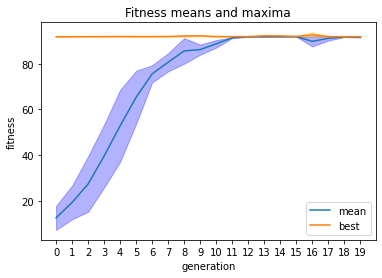

In [168]:
lb_mean = mean_of_means - sd_of_means
ub_mean = mean_of_means + sd_of_means
lb_best = mean_of_bests - sd_of_bests
ub_best = mean_of_bests + sd_of_bests

fig, ax = plt.subplots()
ax.plot(df_plot['mean_of_means'], label='mean')
ax.plot(df_plot['mean_of_bests'], label='best')

plt.fill_between(gen_nums, lb_mean, ub_mean, alpha=.3, color="blue")
plt.fill_between(gen_nums, lb_best, ub_best, alpha=.3, color="orange")
plt.xticks(gen_nums)
ax.set_xlabel("generation")
ax.set_ylabel("fitness")
ax.set_title("Fitness means and maxima")
ax.legend()
plt.show()